Take stock price of any company you want and predicts its price by using LSTM. Use only Jupyter notebook code.

In [1]:
#Importing the Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [3]:
# Load the data (replace "stock_data.csv" with your actual file name)
data=pd.read_csv("GOOG.csv")

In [4]:
data

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [5]:
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [6]:
data.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0
1257,GOOG,2021-06-11 00:00:00+00:00,2513.93,2526.990,2498.2900,2524.92,1262309,2513.93,2526.990,2498.2900,2524.92,1262309,0.0,1.0


Symbol: This column represents the symbol or ticker of the financial instrument, in this case, "GOOG" which typically refers to Google's stock. 

Date: This column denotes the date of the recorded financial data. 

Close: The closing price of the stock on a particular trading day.

High: The highest price reached by the stock during the trading day.

Low: The lowest price reached by the stock during the trading day. 

Open: The opening price of the stock at the beginning of the trading day.

Volume: The total number of shares or contracts traded on the given trading day.

adjClose: The adjusted closing price, which takes into account any corporate actions such as stock splits or dividends. 

adjHigh: The adjusted highest price, considering any corporate actions. 

adjLow: The adjusted lowest price, considering any corporate actions. 

adjOpen: The adjusted opening price, considering any corporate actions.

adjVolume: The adjusted trading volume, which accounts for any corporate actions.

divCash: The amount of cash dividend distributed per share.

splitFactor: The factor by which the stock was split. A value of 1 indicates no stock split occurred.

In [7]:
data.info() 

#provides a concise summary of the DataFrame, including information about the column names, data types, and the number of non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [8]:
data.describe()

#provides descriptive statistics of a DataFrame. When called on a DataFrame object, it computes various summary statistics for each numerical column in the DataFrame, such as count, mean, standard deviation, minimum, quartiles, and maximum values.

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [9]:
data.isnull().sum() 

#it will display the number of missing values in each column of the DataFrame data

symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [10]:
data=data[["date","open","close"]]
data 

#After executing this code, the DataFrame data will only contain the columns "date", "open", and "close", while all other columns will be excluded. The resulting DataFrame will have the same rows as the original DataFrame, but only the selected columns will be retained.

,date,open,close
0,2016-06-14 00:00:00+00:00,716.48,718.27
1,2016-06-15 00:00:00+00:00,719.00,718.92
2,2016-06-16 00:00:00+00:00,714.91,710.36
3,2016-06-17 00:00:00+00:00,708.65,691.72
4,2016-06-20 00:00:00+00:00,698.77,693.71
...,...,...,...
1253,2021-06-07 00:00:00+00:00,2451.32,2466.09
1254,2021-06-08 00:00:00+00:00,2479.90,2482.85
1255,2021-06-09 00:00:00+00:00,2499.50,2491.40
1256,2021-06-10 00:00:00+00:00,2494.01,2521.60


In [11]:
data = data[['date','open','close']] # Extracting required columns
data['date'] = pd.to_datetime(data['date'].apply(lambda x: x.split()[0])) # Selecting only date
data.set_index('date',drop=True,inplace=True) # Setting date column as index
data.head()

,open,close
date,,
2016-06-14,716.48,718.27
2016-06-15,719.00,718.92
2016-06-16,714.91,710.36
2016-06-17,708.65,691.72
2016-06-20,698.77,693.71


C:\Users\sivap\AppData\Local\Temp\ipykernel_15088\2479355553.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fg.show()


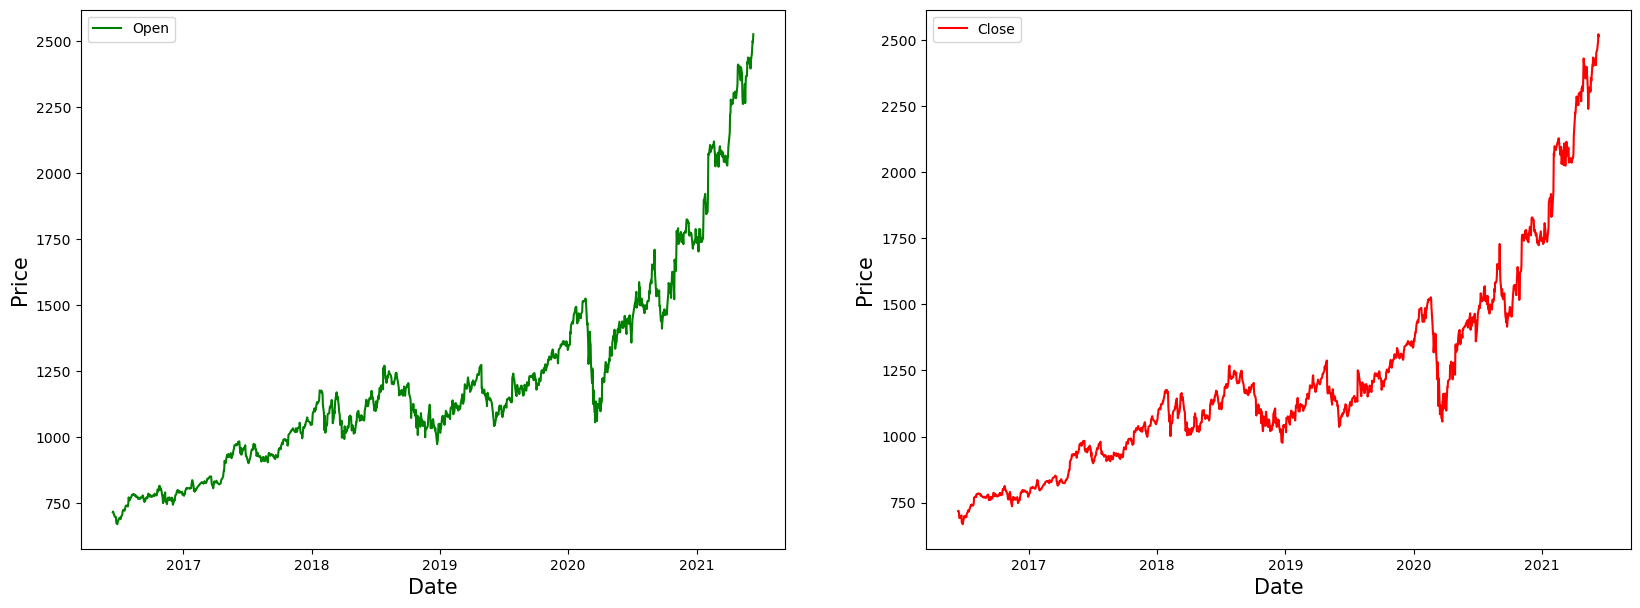

In [13]:
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(data['open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(data['close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fg.show()

# Data Pre-Processing

In [14]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
data[data.columns] = MMS.fit_transform(data)

In [15]:
data.shape

(1258, 2)

In [16]:
training_size = round(len(data) * 0.80) # Selecting 80 % for training and 20 % for testing
training_size

1006

In [17]:
train_data = data[:training_size]
test_data  = data[training_size:]

train_data.shape, test_data.shape

((1006, 2), (252, 2))

In [18]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))


In [19]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [20]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((956, 50, 2), (956, 2), (202, 50, 2), (202, 2))

# Creating LSTM model

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [22]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(train_seq, train_label, epochs=80,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/80
30/30 [==============================] - 5s 73ms/step - loss: 0.0086 - mean_absolute_error: 0.0647 - val_loss: 0.0150 - val_mean_absolute_error: 0.1027
Epoch 2/80
30/30 [==============================] - 1s 45ms/step - loss: 9.4055e-04 - mean_absolute_error: 0.0244 - val_loss: 0.0075 - val_mean_absolute_error: 0.0727
Epoch 3/80
30/30 [==============================] - 1s 42ms/step - loss: 5.8791e-04 - mean_absolute_error: 0.0173 - val_loss: 0.0037 - val_mean_absolute_error: 0.0488
Epoch 4/80
30/30 [==============================] - 1s 42ms/step - loss: 5.7526e-04 - mean_absolute_error: 0.0170 - val_loss: 0.0042 - val_mean_absolute_error: 0.0521
Epoch 5/80
30/30 [==============================] - 1s 41ms/step - loss: 5.5080e-04 - mean_absolute_error: 0.0165 - val_loss: 0.0034 - val_mean_absolute_error: 0.0463
Epoch 6/80
30/30 [==============================] - 1s 42ms/step - loss: 5.1982e-04 - mean_absolute_error: 0.0162 - val_loss: 0.0032 - val_mean_absolute_error: 0.0451
Ep

In [24]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

7/7 [==============================] - 1s 16ms/step


array([[0.48378307, 0.4886309 ],
       [0.49076676, 0.4958359 ],
       [0.4954553 , 0.50085443],
       [0.508917  , 0.5128273 ],
       [0.5196818 , 0.5234678 ]], dtype=float32)

In [25]:
test_inverse_predicted = MMS.inverse_transform(test_predicted) # Inversing scaling on predicted data
test_inverse_predicted[:5]

array([[1567.8951, 1573.8593],
       [1580.8423, 1587.2125],
       [1589.5344, 1596.5135],
       [1614.4913, 1618.7034],
       [1634.4485, 1638.4238]], dtype=float32)

# Visualizing predicted and actual data

In [26]:
# Merging actual and predicted data for better visualization

gs_slic_data = pd.concat([data.iloc[-202:].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=data.iloc[-202:].index)], axis=1)

In [27]:
gs_slic_data[['open','close']] = MMS.inverse_transform(gs_slic_data[['open','close']]) # Inverse scaling

In [28]:
gs_slic_data.head()

,open,close,open_predicted,close_predicted
date,,,,
2020-08-24,1593.98,1588.20,1567.895142,1573.859253
2020-08-25,1582.07,1608.22,1580.842285,1587.212524
2020-08-26,1608.00,1652.38,1589.534424,1596.513550
2020-08-27,1653.68,1634.33,1614.491333,1618.703369
2020-08-28,1633.49,1644.41,1634.448486,1638.423828


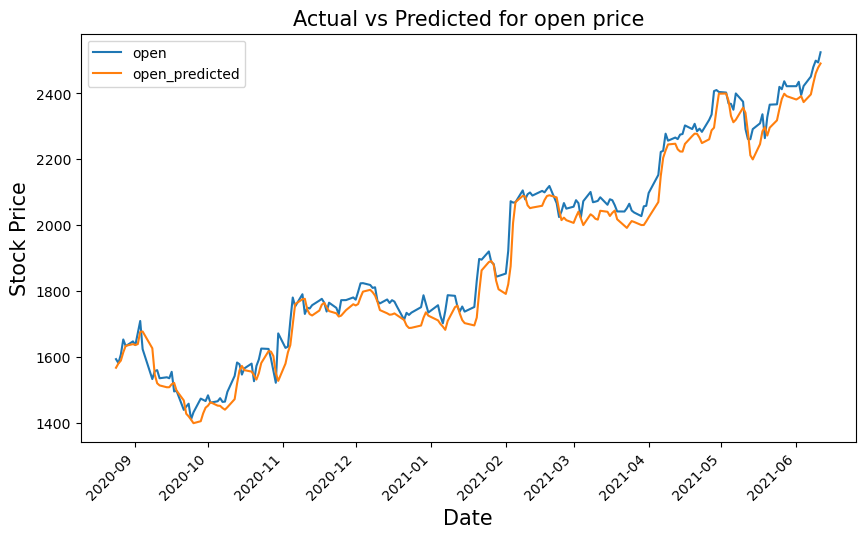

In [29]:
gs_slic_data[['open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

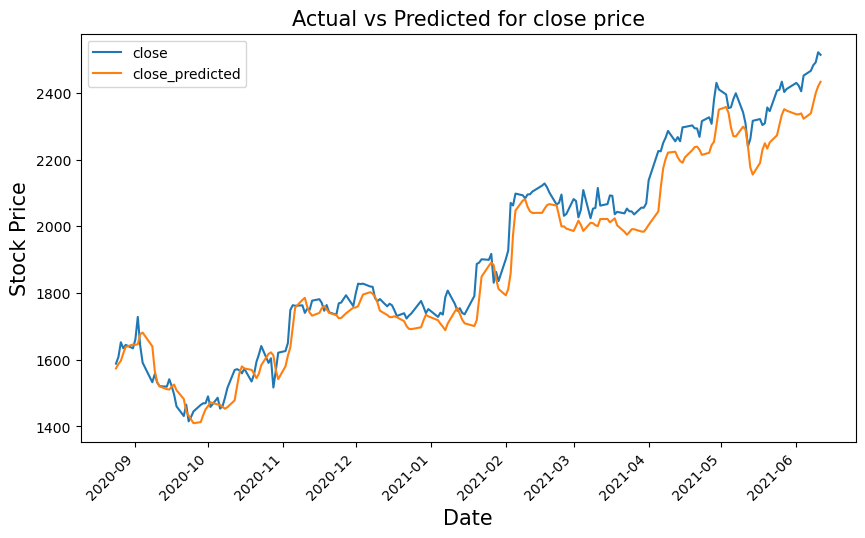

In [30]:
gs_slic_data[['close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

# Predicting upcoming 10 days

In [31]:
# Creating a dataframe and adding 10 days to existing index 

gs_slic_data = gs_slic_data.append(pd.DataFrame(columns=gs_slic_data.columns,index=pd.date_range(start=gs_slic_data.index[-1], periods=11, freq='D', closed='right')))


C:\Users\sivap\AppData\Local\Temp\ipykernel_15088\3062588007.py:3: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  gs_slic_data = gs_slic_data.append(pd.DataFrame(columns=gs_slic_data.columns,index=pd.date_range(start=gs_slic_data.index[-1], periods=11, freq='D', closed='right')))
C:\Users\sivap\AppData\Local\Temp\ipykernel_15088\3062588007.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gs_slic_data = gs_slic_data.append(pd.DataFrame(columns=gs_slic_data.columns,index=pd.date_range(start=gs_slic_data.index[-1], periods=11, freq='D', closed='right')))


In [33]:
gs_slic_data['2021-06-09	':'2021-06-16']

,open,close,open_predicted,close_predicted
2021-06-09,2499.50,2491.40,2460.666748,2399.050781
2021-06-10,2494.01,2521.60,2478.359131,2419.460693
2021-06-11,2524.92,2513.93,2490.827637,2433.102295
2021-06-12,NaN,NaN,NaN,NaN
2021-06-13,NaN,NaN,NaN,NaN
2021-06-14,NaN,NaN,NaN,NaN
2021-06-15,NaN,NaN,NaN,NaN
2021-06-16,NaN,NaN,NaN,NaN


In [34]:
upcoming_prediction = pd.DataFrame(columns=['open','close'],index=gs_slic_data.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [35]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 47ms/step


In [36]:
upcoming_prediction[['open','close']] = MMS.inverse_transform(upcoming_prediction[['open','close']])

C:\Users\sivap\AppData\Local\Temp\ipykernel_15088\4155468105.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fg.show()


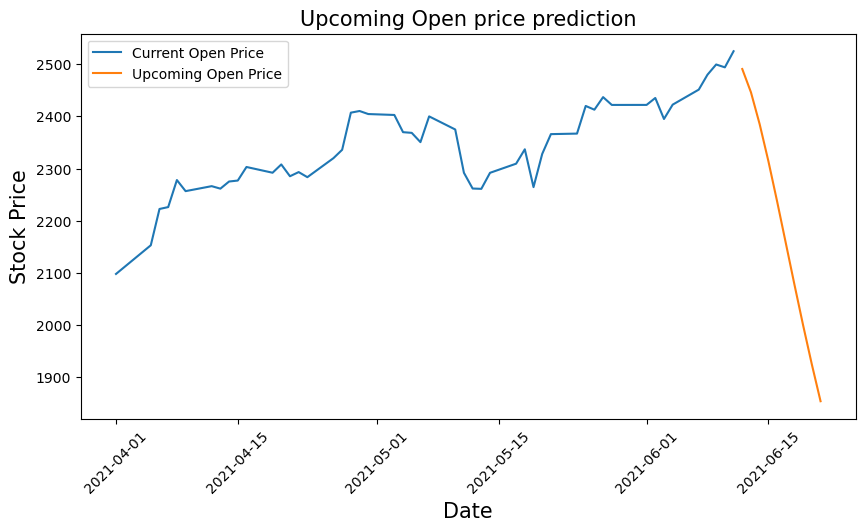

In [37]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2021-04-01':,'open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fg.show()

C:\Users\sivap\AppData\Local\Temp\ipykernel_15088\548185773.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fg.show()


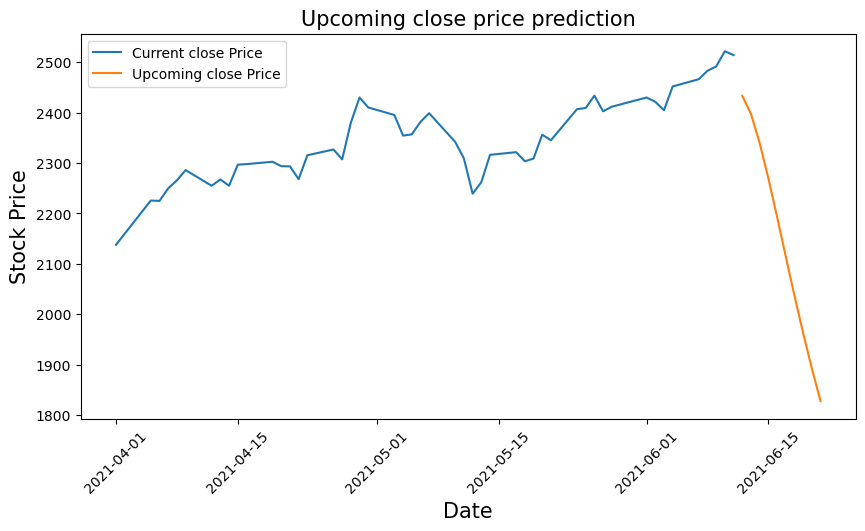

In [38]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2021-04-01':,'close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2021-04-01':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fg.show()